## What is Anomaly Detection?

   Anomaly (or outlier, noise, novelty) is an element with the properties that differ from the majority of the observation data. Anomalies may define the errors, extremes, or abnormal cases in observation data. Identifying those anomaly samples in a dataset is called anomaly detection in machine learning and data analysis.
   The clustering algorithms are one of the main methods used in this field. Grouping the samples in observation data by their density level can help to extract scarce or rare cases in a dataset. The below plot shows the detected anomalies in a given dataset. The threshold that defines the abnormality level of sample, can be defined according to data content and user's choice in analysis.

   ![](https://1.bp.blogspot.com/-_W-XsmMdf64/XqvdBnoyHkI/AAAAAAAAAv4/rbnMNbfB-Gou44oAUYM1MnkOuxk_AwRwACLcBGAsYHQ/s1600/combined.JPG)

## 1. One-Class SVM Method

  A One-class classification method is used to detect the outliers and anomalies in a dataset. Based on Support Vector Machines (SVM) evaluation, the One-class SVM applies a One-class classification method for novelty detection.
   The tutorial briefly explains how to detect anomaly in a dataset by using the One-class SVM method in Python.

   A One-class classification method is used to detect the outliers and anomalies in a dataset. Based on Support Vector Machines (SVM) evaluation, the One-class SVM applies a One-class classification method for novelty detection.
   In this tutorial, we'll briefly learn how to detect anomaly in a dataset by using the One-class SVM method in Python. The Scikit-learn API provides the OneClassSVM class for this algorithm and we'll use it in this tutorial. The tutorial covers:
1. Preparing the data
2. Defining the model and prediction
3. Anomaly detection with scores

In [1]:
# loading libraries
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

>**Note:** The `make_blobs()` function in Python is used to generate synthetic data for clustering and classification algorithms. It creates isotropic Gaussian blobs, which are clusters of points that are normally distributed around a central point. The function takes a number of arguments, including the number of clusters to generate, the number of samples to generate, and the standard deviation of the clusters.

## Create a synthetic data suitable for our problem
We'll create a random sample dataset for this tutorial by using the `make_blob()` function. We'll check the dataset by visualizing it in a plot.

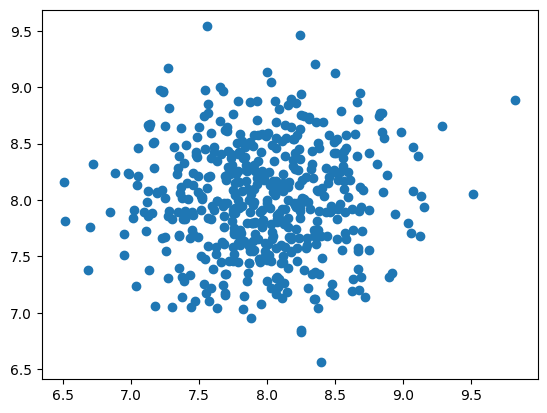

In [3]:
import random
random.seed(13)
x, y= make_blobs(n_samples=500, centers=1, cluster_std=.5, center_box=(8, 8))

plt.scatter(x[:,0], x[:,1])
plt.show()

In [ ]:
#print(x)

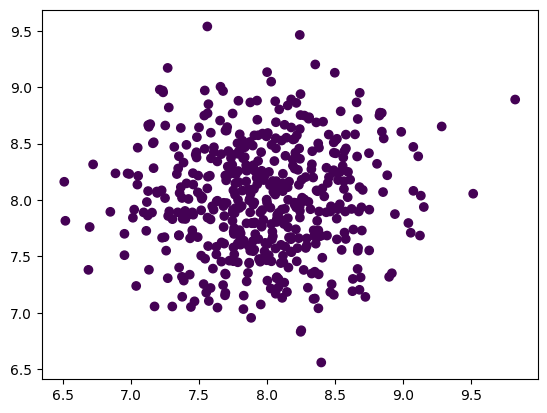

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

## Model development
We'll define the model by using the `OneClassSVM` class of `Scikit-learn` API. Here, we'll set `RBF` for kernel type and define the gamma and the 'nu' arguments.

>[:Note] *Reference:*
>https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

In [5]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
print(svm)

OneClassSVM(gamma=0.001, nu=0.03)


We'll fit the model with x dataset and get the prediction data by using the `fit()` and `predict()` method.


In [6]:
svm.fit(x)

OneClassSVM(gamma=0.001, nu=0.03)

In [20]:
# create prediction using the
pred = svm.predict(x)

In [21]:
print(pred)

[ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

## Creating a `Pseudo` frequency distribution

In [9]:
unique_elements, counts = np.unique(pred, return_counts=True)

# Create a dictionary to store the frequency distribution
frequency_distribution = {}

# Iterate over the unique elements and their counts, and add them to the dictionary
for i in range(len(unique_elements)):
    frequency_distribution[unique_elements[i]] = counts[i]

# Print the frequency distribution
print(frequency_distribution)

{-1: 12, 1: 488}


## Identification of outliers

Next, we'll extract the negative outputs as the outliers.


In [11]:
anom_index = np.where(pred==-1)
values = x[anom_index]

Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.


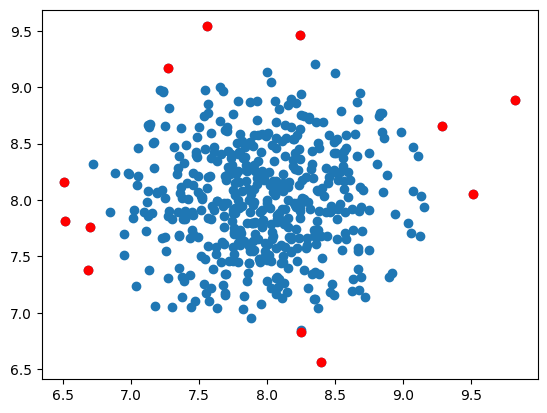

In [12]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

## Statistical apprach to remove outliers

In [33]:
# in case of univariate data:
# Calculate the 25th and 75th percentiles
q1 = np.percentile(x[:,0], 25)
q3 = np.percentile(x[:,0], 75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Identify outliers
outliersU = []
for value in x[:,0]:
    if value < lower_bound or value > upper_bound:
        outliersU.append(value)

# Print the outliers
print(outliersU)

[6.689349206009935, 9.823302031241088, 6.519975027081526, 9.51501381985402, 9.283643999551536, 6.511841659008368]


In [34]:
# Calculate the 25th and 75th percentiles
q1 = np.percentile(pred, 25)
q3 = np.percentile(pred, 75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Identify outliers
outliers = []
for value in pred:
    if value < lower_bound or value > upper_bound:
        outliers.append(value)

# Print the outliers
print(outliers)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [35]:
np.unique(outliers)

array([-1])

Now extract these outliers

In [38]:
O_index=np.where(pred==np.unique(outliers))
values = x[O_index]

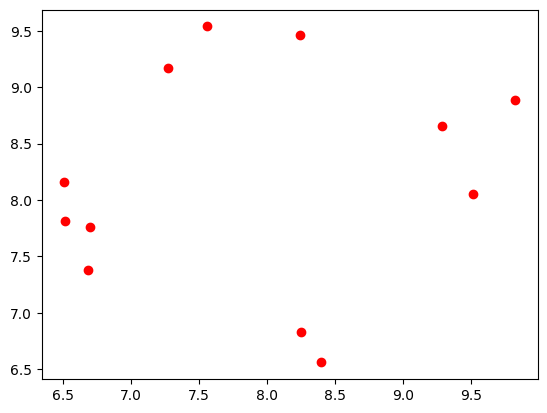

In [39]:
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

## Anomaly detection with scores from `one-class SVM`

We can find anomalies by using their scores. In this method, we'll define the model, fit it on the `x` data by using the `fit_predict()` method. We'll calculate the outliers according to the score value of each element.

In [40]:
pred = svm.fit_predict(x)
scores = svm.score_samples(x)

In [41]:
# distance from the support margins
#print(scores)

Next, we'll obtain the threshold value from the scores by using the `quantile` function. Here, we'll get the lowest 3 percent of score values as the anomalies.

In [43]:
thresh = np.quantile(scores, 0.03)
print(thresh)

14.945767772793467


Next, we'll extract the anomalies by comparing the threshold value and identify the values of elements.


In [45]:
index = np.where(scores<=thresh)
values = x[index]

Finally, we can visualize the results in a plot by highlighting the anomalies with a color.


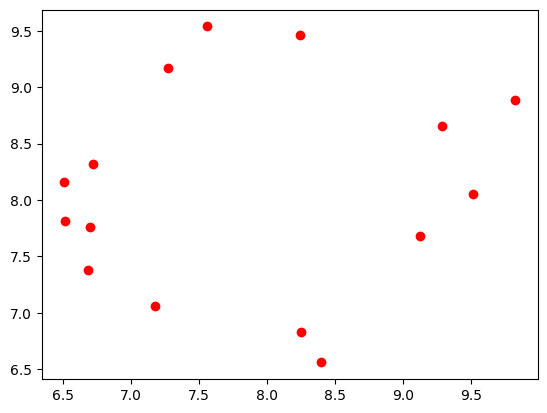

In [46]:
#plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

## 2. Isolation Forest Method
The Isolation Forest is an efficient anomaly detection technique. It constructs a set of binary trees called Isolation Trees by randomly selecting features and recursively splitting data points. Anomalies, being rare, are easier to isolate and have shorter paths in the trees, while normal data points require more splits, resulting in longer paths. By measuring the average path length, the algorithm identifies anomalies as data points with shorter paths, falling below a predefined threshold. Isolation Forest is highly effective for detecting outliers, especially in high-dimensional data, making it valuable for applications like fraud detection and network security.

>The algorithm creates isolation trees (iTrees), holding the path length characteristics of the instance of the dataset, and Isolation Forest (iForest) applies no distance or density measures to detect anomalies.

   

In [47]:
# loading library
from sklearn.ensemble import IsolationForest


### Defining the model and prediction

We'll define the model by using the IsolationForest class of Scikit-learn API. We'll set estimators number and contamination value in arguments of the class.

In [48]:
iforest = IsolationForest(n_estimators=100, contamination=.02)


We'll fit the model with x dataset and get the prediction data with `fit_predict()` function.

In [49]:
pred = iforest.fit_predict(x)


We'll extract the negative outputs as the outliers.


In [51]:
anom_index = np.where(pred==-1)
values = x[anom_index]


Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.


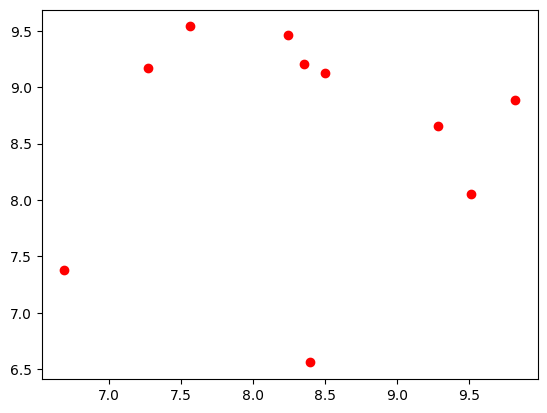

In [52]:
#plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()


>**Note:** While considering the detected anomalies, one class SVM perform better.

### Second approach- Anomaly detection with scores

In the second method, we'll define the model without setting the contamination argument.

In [53]:
iforest = IsolationForest(n_estimators=100)
print(iforest)

IsolationForest()


We'll fit the model with x dataset, then extract the samples score.


In [54]:
iforest.fit(x)
scores = iforest.score_samples(x)

Next, we'll obtain the threshold value from the scores by using the quantile function. Here, we'll get the lowest 2 percent of samples as the anomalies.

In [56]:
thresh = np.quantile(scores, .02)
print(thresh)

-0.6270636400364769


We'll extract the anomalies by comparing the threshold value and get values from the indexes.


In [57]:
index = np.where(scores <= thresh)
values = x[index]

Finally, we can visualize the results in a plot by highlighting the anomalies with a color.


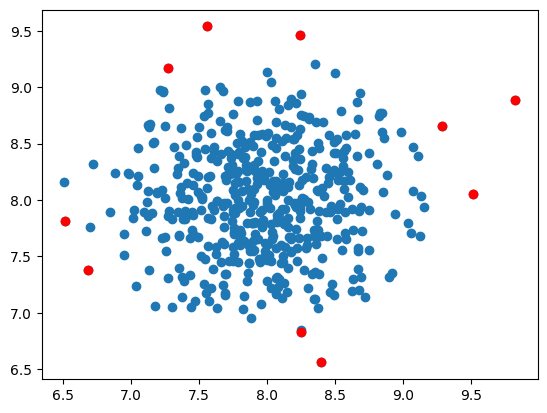

In [58]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

## 3. Anomaly Detection Example with Local Outlier Factor in Python
   The Local Outlier Factor is an algorithm to detect anomalies in observation data. Measuring the local density score of each sample and weighting their scores are the main concept of the algorithm. By comparing the score of the sample to its neighbors, the algorithm defines the lower density elements as anomalies in data. The Scikit-learn API provides the LocalOutlierFactor class for this algorithm and we'll use it here.

In [59]:
# loading required library
from sklearn.neighbors import LocalOutlierFactor


## Defining the model and prediction

We'll define the model by using the LocalOutlierFactor class of Scikit-learn API. We'll set estimators number and contamination value in arguments. Contamination defines the proportion of outliers in a dataset.

In [60]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)


We'll fit the model on x dataset and get the prediction data with the fit_predict() method.


In [61]:
y_pred = lof.fit_predict(x)


We'll extract the negative outputs as the outliers.


In [62]:
lofs_index = np.where(y_pred==-1)
values = x[lofs_index]

Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.


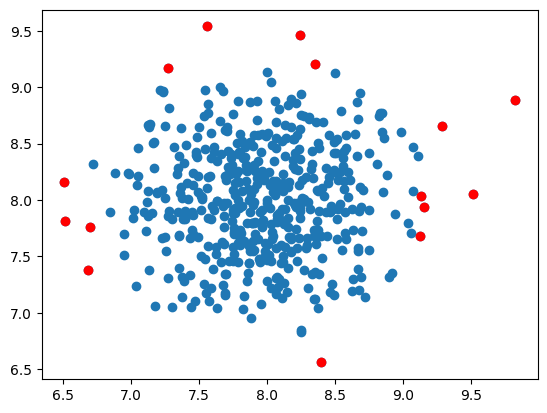

In [63]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

### Second approach- Anomaly detection with scores

In the second method, we'll define the model without setting the contamination argument.

In [64]:
model = LocalOutlierFactor(n_neighbors=20)
model.fit_predict(x)
lof = model.negative_outlier_factor_


Next, we'll obtain the threshold value from the scores by using the quantile function. Here, we'll get the lowest 3 percent of score values as the anomalies. We just follow the same method as we did in the previous methods.

In [66]:
thresh = np.quantile(lof, .03)
print(thresh)

-1.4519248326883805


In [67]:
index = np.where(lof<=thresh)
values = x[index]

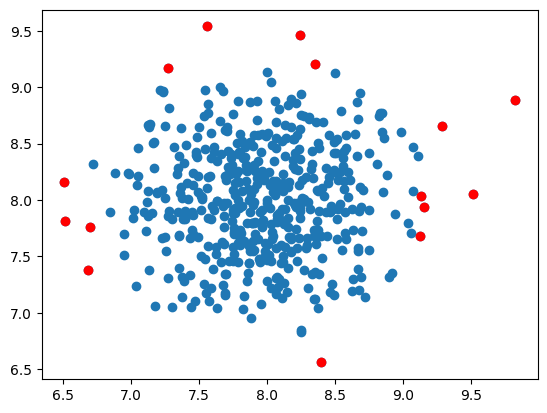

In [68]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

## 4. Anomaly Detection Example with Elliptical Envelope in Python

 The Elliptical Envelope method is a statistical and machine learning technique used for detecting outliers or anomalies in a dataset. It's particularly useful when you have multivariate data (data with multiple features or dimensions) and you want to identify observations that deviate significantly from the normal. The Elliptical Envelope method detects the outliers in a Gaussian distributed data.
Scikit-learn API provides the EllipticEnvelope class to apply this method for anomaly detection.

In [69]:
# loading required library
from sklearn.covariance import EllipticEnvelope


### Defining the model and prediction

We'll define the model by using the EllipticEnvelope class of Scikit-learn API. We'll define the contamination value in a class definition. Contamination argument defines the proportion of outliers in a dataset.

In [70]:
elenv = EllipticEnvelope(contamination=.02)
print(elenv)

EllipticEnvelope(contamination=0.02)


We'll fit the model on x dataset and get the prediction data with the fit_predict() method.


In [71]:
pred = elenv.fit_predict(x)


Next, we'll extract the negative outputs as the outliers.


In [72]:
anom_index = np.where(pred==-1)
values = x[anom_index]


Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.


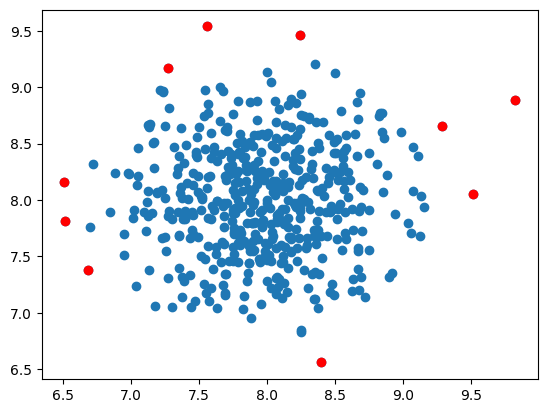

In [73]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

### Second approach- Anomaly detection with scores

We can find anomalies by using their scores. In this method, we'll define the model without setting the contamination argument. In this case, the model applies the default value.

In [74]:
elenv = EllipticEnvelope()
print(elenv)

EllipticEnvelope()


In [75]:
elenv.fit(x)
scores = elenv.score_samples(x)

In [76]:
thresh = np.quantile(scores, .02)
print(thresh)

-8.00049681988771


In [77]:
index = np.where(scores <= thresh)
values = x[index]

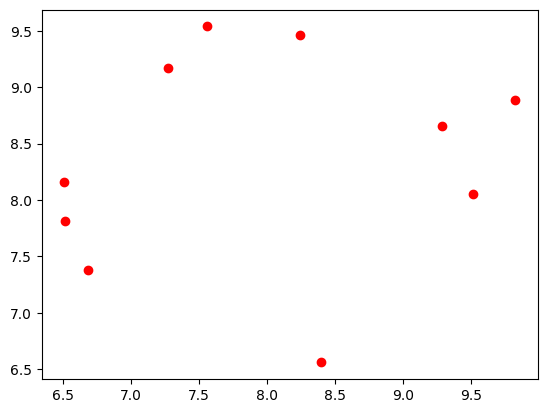

In [78]:
#plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

## 5. Anomaly Detection with DBSCAN in Python

The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. The main principle of this algorithm is that it finds core samples in a dense area and groups the samples around those core samples to create clusters.

In [79]:
# loading required library
from sklearn.cluster import DBSCAN


### Defining the model and anomaly detection

   We'll define the model by using the DBSCAN class of Scikit-learn API. We'll define the 'eps' and 'min_sample' in the arguments of the class. The argument 'eps' is the distance between two samples to be considered as a neighborhood and 'min_samples' is the number of samples in a neighborhood.


In [80]:
dbscan = DBSCAN(eps = 0.28, min_samples = 20)
print(dbscan)

DBSCAN(eps=0.28, min_samples=20)


We'll fit the model with x dataset and get the prediction data with the fit_predict() method.



In [82]:
pred = dbscan.fit_predict(x)


 Next, we'll extract the negative outputs as the outliers.



In [ ]:
anom_index = where(pred == -1)
values = x[anom_index]

Finally, we'll visualize the results in a plot by highlighting the anomalies with a color.


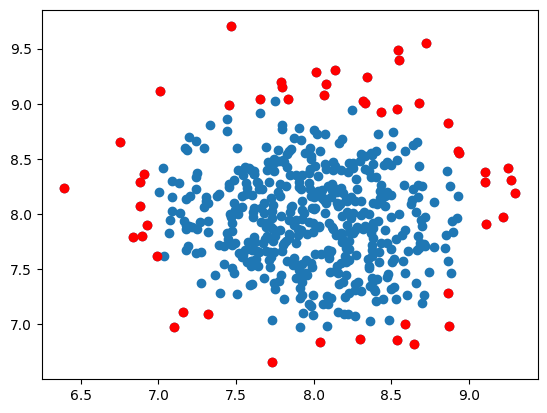

In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

## 6. Anomaly Detection with Gaussian Mixture in Python
The Gaussian Mixture Model (GMM) is a powerful probabilistic model that represents a mixture of Gaussian distributions and it is widely used in clustering problems.


In [ ]:
# loading necessary library
from sklearn.mixture import GaussianMixture

### Defining the model and anomaly detection

  In scikit-learn's GaussianMixture class, the score_samples method computes the log likelihood of each sample in the input data. The log likelihood represents how well the observed data fits the estimated Gaussian mixture model.

  In the context of anomaly detection, we can set a threshold on these log likelihood scores. Samples with log likelihoods below a certain threshold are considered anomalies or outliers, as they are less likely to be generated by the learned Gaussian mixture model.

We'll define the model by using the GaussianMixture class of Scikit-learn. Here, we'll use the class with a default value. You can set some of the arguments according to your dataset content. You can check all default parameters used in a class with get_params() method.

In [ ]:
# Fit a Gaussian Mixture Model to the dataset
gausMix = GaussianMixture().fit(x)

# Access and print entire attribute dictionary
print(gausMix.get_params())

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 1, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


We'll get the weighted log probabilities for each sample with a `score_sample()` method.



In [ ]:
# Compute the weighted log probabilities for each sample
scores = gausMix.score_samples(x)

Next, we'll extract the threshold values from the scores data by using quantile() function.



In [ ]:
# Extract the threshold for anomaly detection using quantile
thresh = quantile(scores, .03)
print(thresh)

-3.910165760838258


Based on the extracted threshold value, we'll identify samples with scores equal to or lower than the threshold.



In [ ]:
# Identify samples with scores equal to or lower than the threshold
index = where(scores <= thresh)
values = x[index]


Finally, we'll visualize the results by highlighting the anomalies in a red.



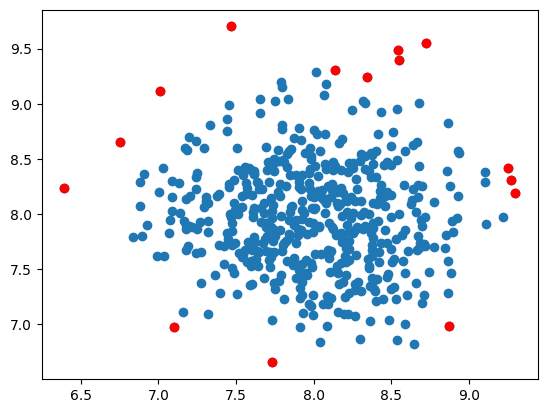

In [ ]:
# Visualize the dataset with anomalies highlighted in red
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(values[:, 0], values[:, 1], color='r')
plt.show()